# Compare AUC values between KiSSim and other methods

AUC values are calculated w.r.t. to Karaman-Davis profiling data for:

- KiSSim (notebook 006/004)
- KLIFS pocket sequence (notebook 006/012)
- KLIFS pocket IFP (notebook 006/011)
- SiteAlign (notebook 006/013)

Show scatter plots KiSSim's AUC vs. other methods' AUC.

In [1]:
from pathlib import Path

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from src.paths import PATH_RESULTS

In [2]:
LIGAND_PROFILING_METHOD = "karaman-davis"
KINASE_DISTANCES_METHODS = [
    "kissim", 
    "klifs-pocket-sequence", 
    "klifs-pocket-ifp", 
    "sitealign-pocket-structure"
]

## Load AUC data

In [3]:
auc_list = []
for method in KINASE_DISTANCES_METHODS:
    auc_path = PATH_RESULTS / f"dfg_in/auc/auc_{method}_vs_{LIGAND_PROFILING_METHOD}.csv"
    auc_df = pd.read_csv(auc_path, index_col=0).set_index(["ligand", "kinase"])
    auc_series = auc_df.squeeze()
    auc_series.name = method
    auc_list.append(auc_series)

In [4]:
auc_summary_df = pd.concat(auc_list, axis=1).dropna()
print(auc_summary_df.shape)
auc_summary_df.head()

(48, 4)


kissim  klifs-pocket-sequence  klifs-pocket-ifp  \
ligand    kinase                                                      
Afatinib  EGFR    0.789474               0.812500          0.847222   
          ErbB2   0.789474               0.804688          0.847222   
          ErbB4   0.763158               0.812500          0.895833   
Axitinib  KDR     0.780612               0.862500          0.601111   
Bosutinib ABL1    0.795556               0.722727          0.593069   

                  sitealign-pocket-structure  
ligand    kinase                              
Afatinib  EGFR                      0.736842  
          ErbB2                     0.934211  
          ErbB4                     0.934211  
Axitinib  KDR                       0.642857  
Bosutinib ABL1                      0.729495

## Compare KiSSim's AUC with other methods' AUC

In [5]:
def all_in_one_scatter(auc_summary_df):
    
    auc_summary_melt_df = pd.melt(
        auc_summary_df, 
        id_vars=[auc_summary_df.columns[0]], 
        value_vars=auc_summary_df.columns[1:]
    )
    fig, ax = plt.subplots(figsize=(6, 6))
    ax.set_xlim(0, 1)
    ax.set_ylim(0, 1)
    ax.set_box_aspect(1)

    sns.scatterplot(
        x=auc_summary_melt_df["kissim"], 
        y=auc_summary_melt_df["value"], 
        hue=auc_summary_melt_df["variable"],
        ax=ax,
        alpha=0.7,
    )
    ax.plot([0, 1], [0, 1])

In [6]:
def per_method_scatter(auc_summary_df, color_by_ligand=True):
    
    fig, axes = plt.subplots(1, 3, figsize=(15, 5))

    for i, external_method in enumerate(auc_summary_df.columns[1:]):

        ax = axes[i]
        ax.set_xlim(0, 1)
        ax.set_ylim(0, 1)
        ax.set_box_aspect(1)
        
        if color_by_ligand:
            hue = auc_summary_df.reset_index()["ligand"].to_list()
        else:
            hue = None

        sns.scatterplot(
            x=auc_summary_df[auc_summary_df.columns[0]], 
            y=auc_summary_df[external_method], 
            ax=ax,
            hue=hue
        )
        ax.plot([0, 1], [0, 1])

### All ligands

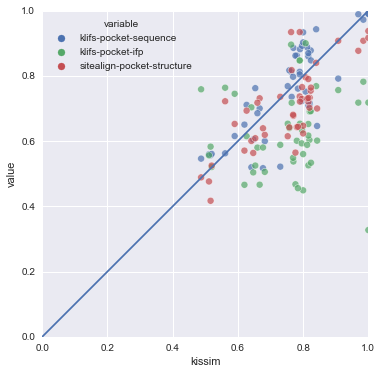

In [7]:
all_in_one_scatter(auc_summary_df)

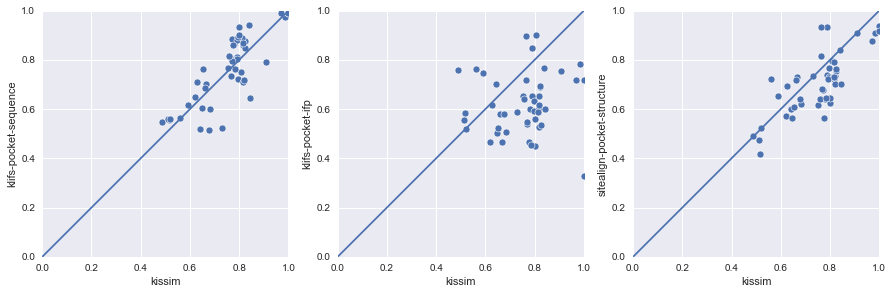

In [8]:
per_method_scatter(auc_summary_df, color_by_ligand=False)

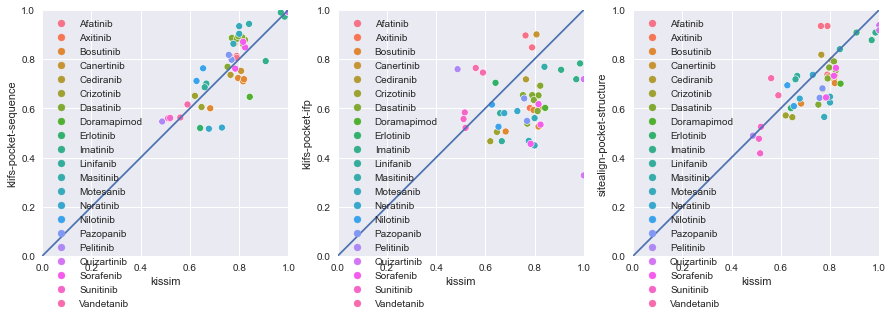

In [9]:
per_method_scatter(auc_summary_df, color_by_ligand=True)

### Selected ligands

In [10]:
auc_summary_df_selected = auc_summary_df.loc[
    ["Erlotinib", "Imatinib", "Bosutinib", "Doramapimod"], :
]

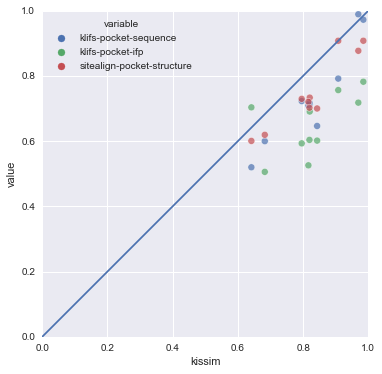

In [11]:
all_in_one_scatter(auc_summary_df_selected)

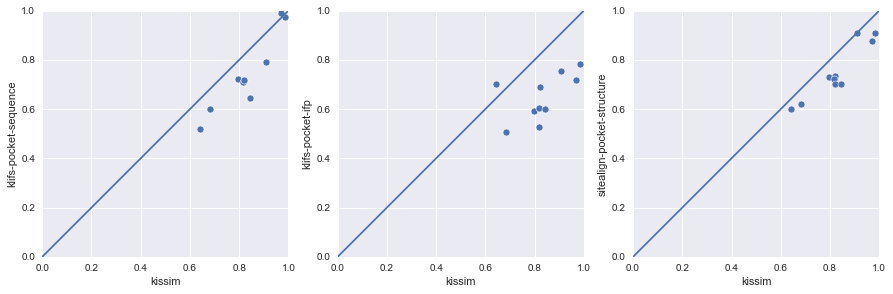

In [12]:
per_method_scatter(auc_summary_df_selected, color_by_ligand=False)

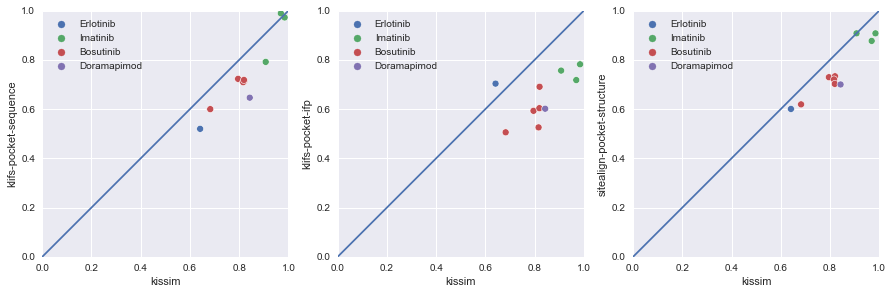

In [13]:
per_method_scatter(auc_summary_df_selected, color_by_ligand=True)